# Import the dependencies

In [114]:
import numpy as np
import pandas as pd

import seaborn as sn

import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Some theory by ChatGPT:

Here are the top 10 methods commonly used for solving regression problems in Python:

1. Linear Regression: Fits a linear model to the data by minimizing the sum of squared residuals.
2. Decision Tree Regression: Uses a decision tree to make predictions based on feature values.
3. Random Forest Regression: An ensemble method that combines multiple decision trees to make predictions.
4. Gradient Boosting Regression: Builds an ensemble of weak prediction models (usually decision trees) sequentially, where each model corrects the mistakes of the previous one.
5. Support Vector Regression: Uses support vector machines to perform regression by finding the optimal hyperplane that maximally fits the data.
6. Neural Network Regression: Utilizes artificial neural networks to learn and model complex relationships in the data.
7. K-Nearest Neighbors Regression: Makes predictions based on the average of the target values of the k nearest neighbors in the feature space.
8. Ridge Regression: Performs linear regression with a penalty term to prevent overfitting by shrinking the coefficients.
9. Lasso Regression: Performs linear regression with a penalty term that encourages sparsity by forcing some coefficients to be exactly zero.
10. Elastic Net Regression: Combines Ridge and Lasso regression techniques to provide a balance between the two.

These methods offer different approaches and are suitable for various regression problem scenarios. It's important to understand their strengths and limitations and choose the most appropriate method based on your specific dataset, problem requirements, and computational considerations.

# Load data

In [2]:
data = pd.read_csv("src/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
data["MiscFeature"].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

# Preprocess data

In [12]:
# Encoding Categorical Features

data_num = pd.DataFrame()
label_encoder = LabelEncoder()

for key_ in data.keys():
    if data[key_].dtypes == "object":
        data_num[key_] = label_encoder.fit_transform(data[key_].to_list())
    else:
        data_num[key_] = data[key_]

In [13]:
data_num.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [14]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
data_num = data_num.drop("Id", axis=1)
data_num.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,2,3,3,0,4,...,0,3,4,4,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,3,4,4,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,3,4,4,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,3,4,4,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,3,4,4,0,12,2008,8,4,250000


# Visualize data

In [107]:
list_cols = []
inner_cols = []
for inx, col_name in enumerate(data_num.columns, start=1):
    inner_cols.append(col_name)
    if inx % 10 == 0:
        list_cols.append(inner_cols)
        inner_cols = []

print(len(list_cols))
print(list_cols)

8
[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig'], ['LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd'], ['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual'], ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC'], ['CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], ['BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish'], ['GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], ['PoolArea

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'MSZoning'}>,
        <Axes: title={'center': 'LotFrontage'}>],
       [<Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'Street'}>,
        <Axes: title={'center': 'Alley'}>],
       [<Axes: title={'center': 'LotShape'}>,
        <Axes: title={'center': 'LandContour'}>,
        <Axes: title={'center': 'Utilities'}>],
       [<Axes: title={'center': 'LotConfig'}>, <Axes: >, <Axes: >]],
      dtype=object)

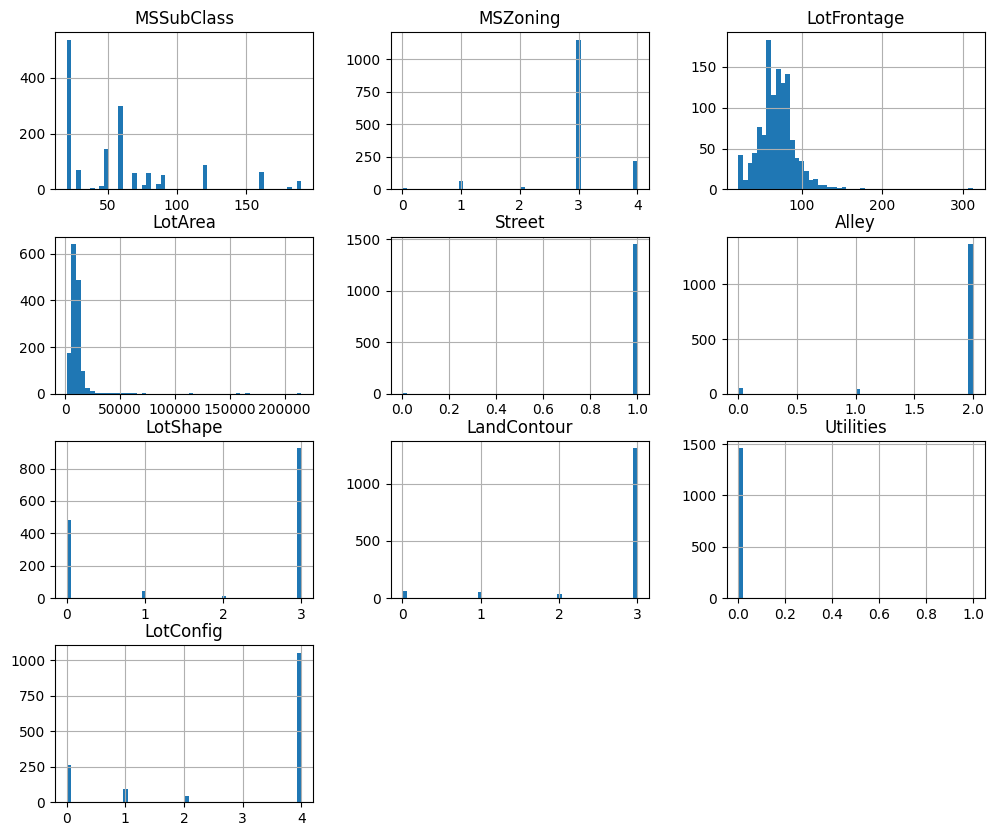

In [33]:
rcParams["figure.figsize"] = 12, 10

data_num[list_cols[0]].hist(bins=50)

In [37]:
data[list_cols[0]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1460 non-null   int64  
 1   MSZoning     1460 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1460 non-null   int64  
 4   Street       1460 non-null   object 
 5   Alley        91 non-null     object 
 6   LotShape     1460 non-null   object 
 7   LandContour  1460 non-null   object 
 8   Utilities    1460 non-null   object 
 9   LotConfig    1460 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 114.2+ KB


In [34]:
data_num_train = pd.DataFrame()

data_num_train["SalePrice"] = np.log(data_num["SalePrice"])

In [48]:
standard_scaler = StandardScaler()

data_num_train['MSSubClass'] = standard_scaler.fit_transform(np.array(data_num['MSSubClass']).reshape(-1, 1))
data_num_train['MSZoning'] = data_num['MSZoning']
data_num_train['LotFrontage'] = standard_scaler.fit_transform(np.array(data_num['LotFrontage'].fillna(0)).reshape(-1, 1))
data_num_train['LotArea'] = np.log(data_num['LotArea'])
data_num_train['Street'] = data_num['Street']
data_num_train['Alley'] = data_num['Alley']
data_num_train['LotShape'] = data_num['LotShape']
data_num_train['LandContour'] = data_num['LandContour']
data_num_train['Utilities'] = data_num['Utilities']
data_num_train['LotConfig'] = data_num['LotConfig']

array([[<Axes: title={'center': 'SalePrice'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'MSZoning'}>],
       [<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'Street'}>],
       [<Axes: title={'center': 'Alley'}>,
        <Axes: title={'center': 'LotShape'}>,
        <Axes: title={'center': 'LandContour'}>],
       [<Axes: title={'center': 'Utilities'}>,
        <Axes: title={'center': 'LotConfig'}>, <Axes: >]], dtype=object)

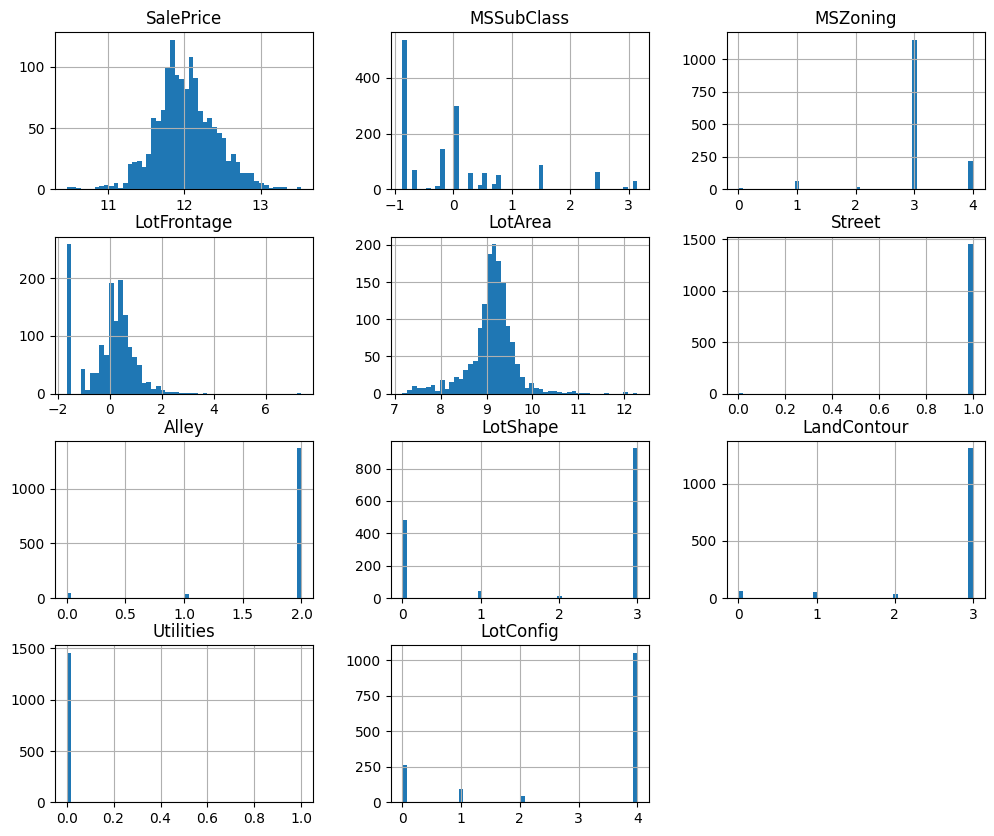

In [49]:
data_num_train.hist(bins=50)

array([[<Axes: title={'center': 'LandSlope'}>,
        <Axes: title={'center': 'Neighborhood'}>,
        <Axes: title={'center': 'Condition1'}>],
       [<Axes: title={'center': 'Condition2'}>,
        <Axes: title={'center': 'BldgType'}>,
        <Axes: title={'center': 'HouseStyle'}>],
       [<Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>, <Axes: >, <Axes: >]],
      dtype=object)

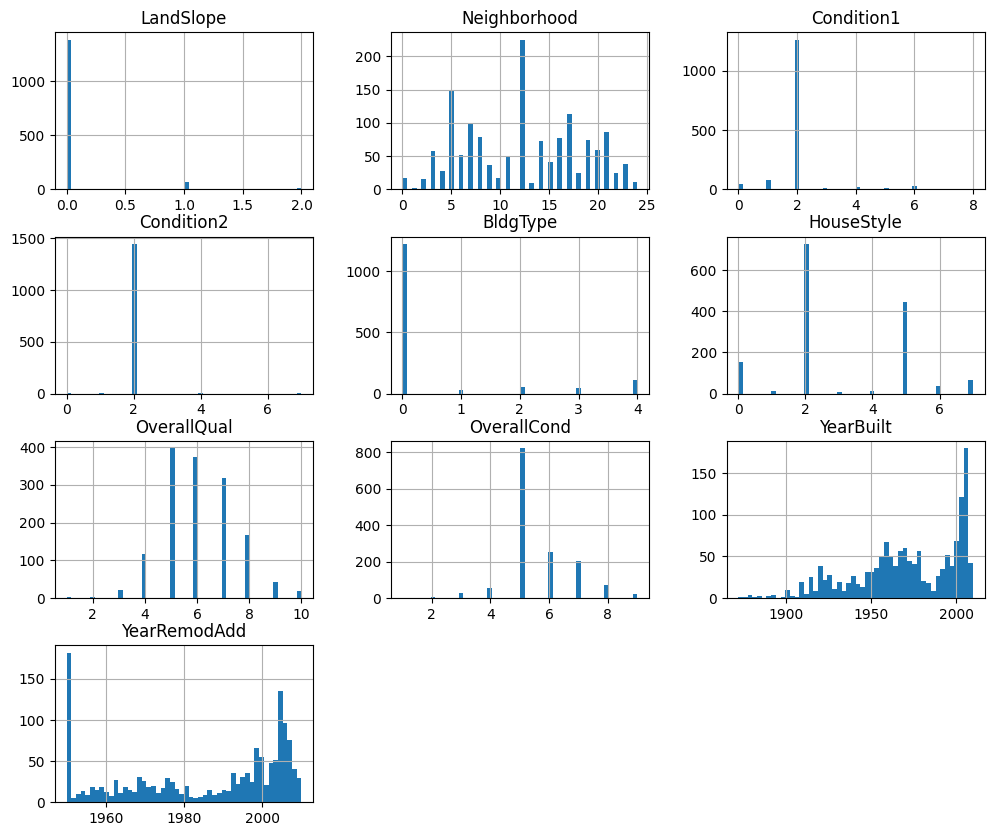

In [50]:
data_num[list_cols[1]].hist(bins=50)

In [51]:
data[list_cols[1]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LandSlope     1460 non-null   object
 1   Neighborhood  1460 non-null   object
 2   Condition1    1460 non-null   object
 3   Condition2    1460 non-null   object
 4   BldgType      1460 non-null   object
 5   HouseStyle    1460 non-null   object
 6   OverallQual   1460 non-null   int64 
 7   OverallCond   1460 non-null   int64 
 8   YearBuilt     1460 non-null   int64 
 9   YearRemodAdd  1460 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 114.2+ KB


In [53]:
data_num_train['LandSlope'] = data_num['LandSlope']
data_num_train['Neighborhood'] = standard_scaler.fit_transform(np.array(data_num['Neighborhood']).reshape(-1, 1))
data_num_train['Condition1'] = data_num['Condition1']
data_num_train['Condition2'] = data_num['Condition2']
data_num_train['BldgType'] = data_num['BldgType']
data_num_train['HouseStyle'] = data_num['HouseStyle']
data_num_train['OverallQual'] = data_num['OverallQual']
data_num_train['OverallCond'] = data_num['OverallCond']
data_num_train['YearBuilt'] = standard_scaler.fit_transform(np.array(data_num['YearBuilt']).reshape(-1, 1))
data_num_train['YearRemodAdd'] = standard_scaler.fit_transform(np.array(data_num['YearRemodAdd']).reshape(-1, 1))

array([[<Axes: title={'center': 'LandSlope'}>,
        <Axes: title={'center': 'Neighborhood'}>,
        <Axes: title={'center': 'Condition1'}>],
       [<Axes: title={'center': 'Condition2'}>,
        <Axes: title={'center': 'BldgType'}>,
        <Axes: title={'center': 'HouseStyle'}>],
       [<Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>, <Axes: >, <Axes: >]],
      dtype=object)

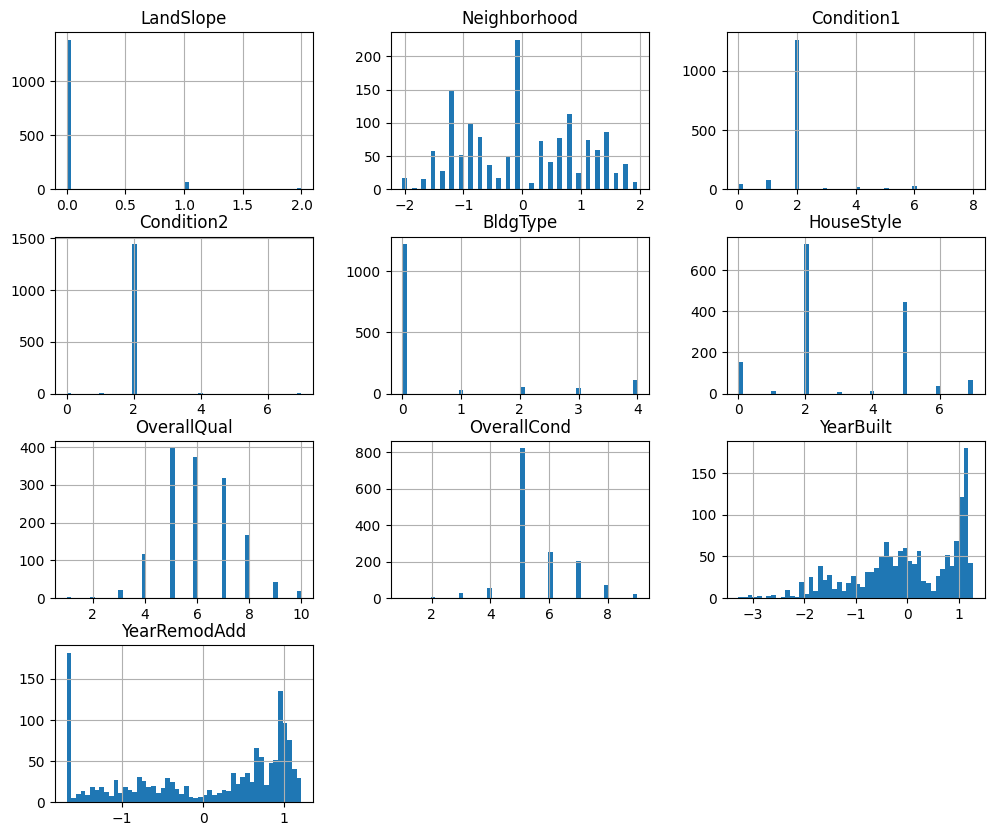

In [55]:
data_num_train[list_cols[1]].hist(bins=50)

array([[<Axes: title={'center': 'RoofStyle'}>,
        <Axes: title={'center': 'RoofMatl'}>,
        <Axes: title={'center': 'Exterior1st'}>],
       [<Axes: title={'center': 'Exterior2nd'}>,
        <Axes: title={'center': 'MasVnrType'}>,
        <Axes: title={'center': 'MasVnrArea'}>],
       [<Axes: title={'center': 'ExterQual'}>,
        <Axes: title={'center': 'ExterCond'}>,
        <Axes: title={'center': 'Foundation'}>],
       [<Axes: title={'center': 'BsmtQual'}>, <Axes: >, <Axes: >]],
      dtype=object)

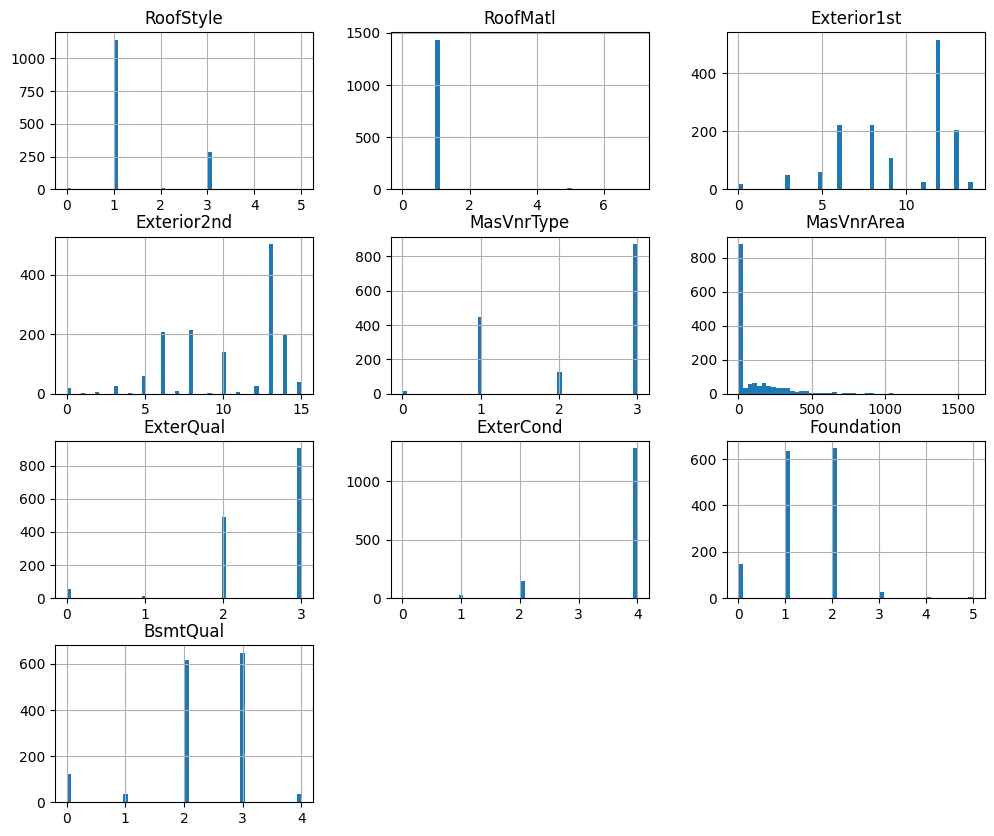

In [56]:
data_num[list_cols[2]].hist(bins=50)

In [57]:
data[list_cols[2]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RoofStyle    1460 non-null   object 
 1   RoofMatl     1460 non-null   object 
 2   Exterior1st  1460 non-null   object 
 3   Exterior2nd  1460 non-null   object 
 4   MasVnrType   588 non-null    object 
 5   MasVnrArea   1452 non-null   float64
 6   ExterQual    1460 non-null   object 
 7   ExterCond    1460 non-null   object 
 8   Foundation   1460 non-null   object 
 9   BsmtQual     1423 non-null   object 
dtypes: float64(1), object(9)
memory usage: 114.2+ KB


In [65]:
data_num_train['RoofStyle'] = data_num['RoofStyle']
data_num_train['RoofMatl'] = data_num['RoofMatl']
data_num_train['Exterior1st'] = data_num['Exterior1st']
data_num_train['Exterior2nd'] = data_num['Exterior2nd']
data_num_train['MasVnrType'] = data_num['MasVnrType']
data_num_train['MasVnrArea'] = standard_scaler.fit_transform(np.array(data_num['MasVnrArea'].fillna(0)).reshape(-1, 1))
data_num_train['ExterQual'] = data_num['ExterQual']
data_num_train['ExterCond'] = data_num['ExterCond']
data_num_train['Foundation'] = data_num['Foundation']
data_num_train['BsmtQual'] = data_num['BsmtQual']

array([[<Axes: title={'center': 'RoofStyle'}>,
        <Axes: title={'center': 'RoofMatl'}>,
        <Axes: title={'center': 'Exterior1st'}>],
       [<Axes: title={'center': 'Exterior2nd'}>,
        <Axes: title={'center': 'MasVnrType'}>,
        <Axes: title={'center': 'MasVnrArea'}>],
       [<Axes: title={'center': 'ExterQual'}>,
        <Axes: title={'center': 'ExterCond'}>,
        <Axes: title={'center': 'Foundation'}>],
       [<Axes: title={'center': 'BsmtQual'}>, <Axes: >, <Axes: >]],
      dtype=object)

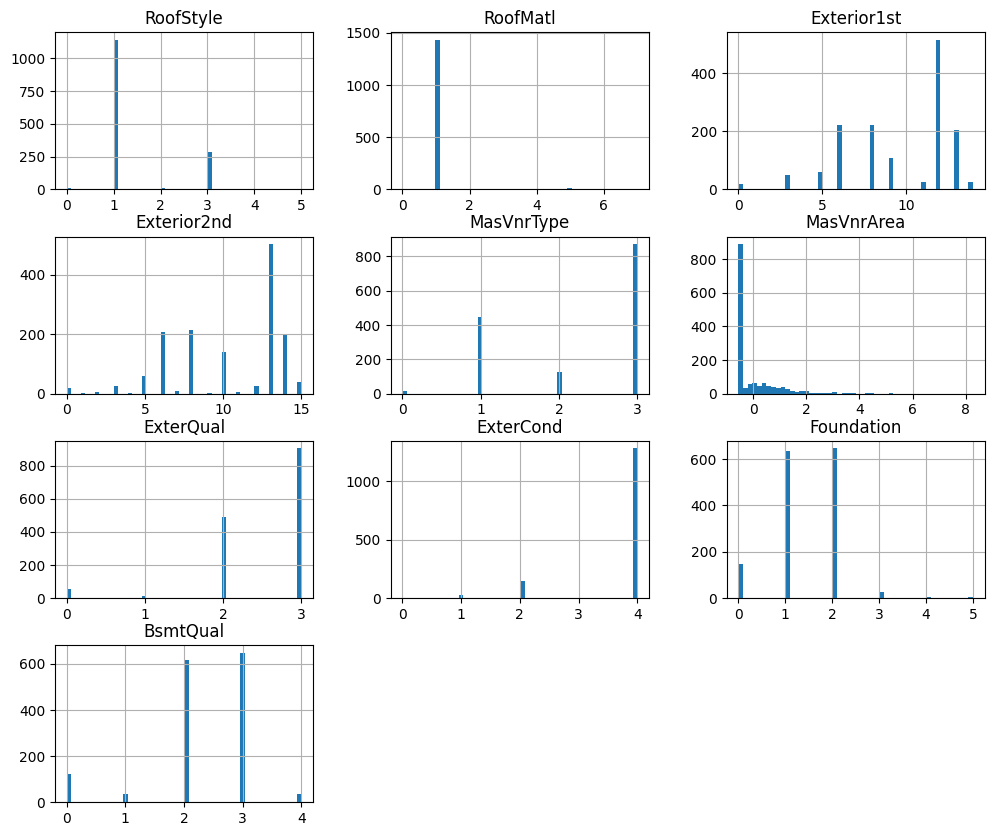

In [66]:
data_num_train[list_cols[2]].hist(bins=50)

array([[<Axes: title={'center': 'BsmtCond'}>,
        <Axes: title={'center': 'BsmtExposure'}>,
        <Axes: title={'center': 'BsmtFinType1'}>],
       [<Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinType2'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>],
       [<Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': 'Heating'}>],
       [<Axes: title={'center': 'HeatingQC'}>, <Axes: >, <Axes: >]],
      dtype=object)

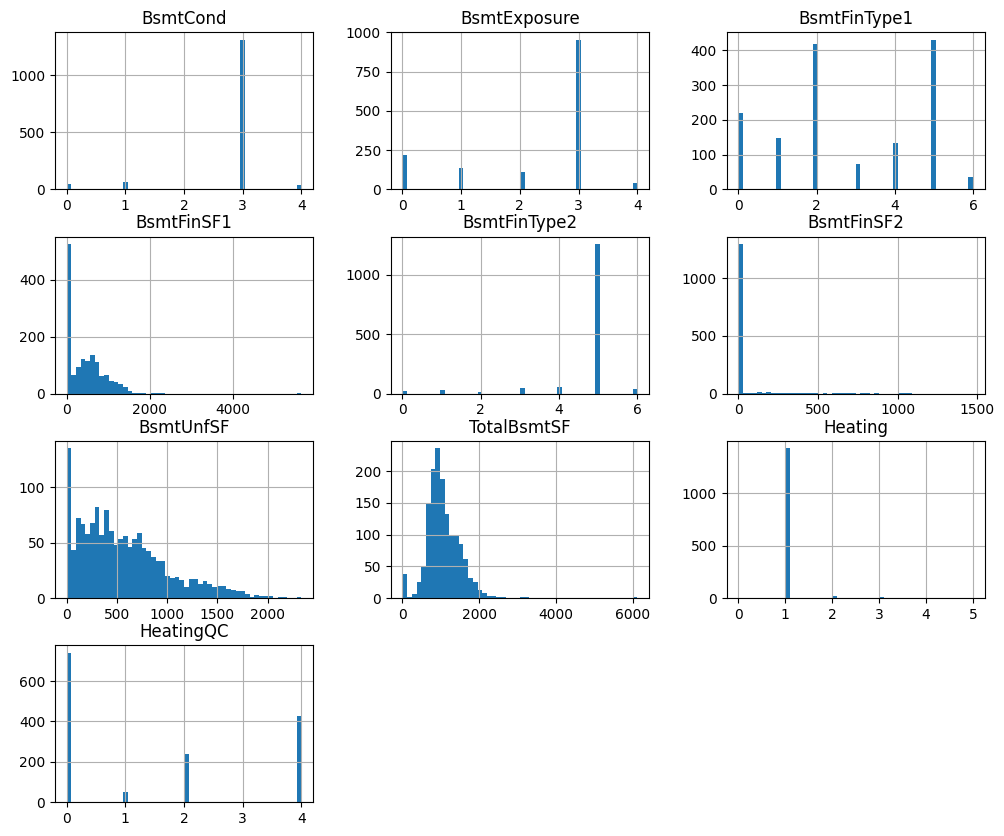

In [67]:
data_num[list_cols[3]].hist(bins=50)

In [70]:
data[list_cols[3]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtCond      1423 non-null   object
 1   BsmtExposure  1422 non-null   object
 2   BsmtFinType1  1423 non-null   object
 3   BsmtFinSF1    1460 non-null   int64 
 4   BsmtFinType2  1422 non-null   object
 5   BsmtFinSF2    1460 non-null   int64 
 6   BsmtUnfSF     1460 non-null   int64 
 7   TotalBsmtSF   1460 non-null   int64 
 8   Heating       1460 non-null   object
 9   HeatingQC     1460 non-null   object
dtypes: int64(4), object(6)
memory usage: 114.2+ KB


In [73]:
data_num_train['BsmtCond'] = data_num['BsmtCond']
data_num_train['BsmtExposure'] = data_num['BsmtExposure']
data_num_train['BsmtFinType1'] = data_num['BsmtFinType1']
data_num_train['BsmtFinSF1'] = standard_scaler.fit_transform(np.array(data_num['BsmtFinSF1']).reshape(-1, 1))
data_num_train['BsmtFinType2'] = data_num['BsmtFinType2']
data_num_train['BsmtFinSF2'] = standard_scaler.fit_transform(np.array(data_num['BsmtFinSF2']).reshape(-1, 1))
data_num_train['BsmtUnfSF'] = standard_scaler.fit_transform(np.array(data_num['BsmtUnfSF']).reshape(-1, 1))
data_num_train['TotalBsmtSF'] = standard_scaler.fit_transform(np.array(data_num['TotalBsmtSF']).reshape(-1, 1))
data_num_train['Heating'] = data_num['Heating']
data_num_train['HeatingQC'] = data_num['HeatingQC']

array([[<Axes: title={'center': 'BsmtCond'}>,
        <Axes: title={'center': 'BsmtExposure'}>,
        <Axes: title={'center': 'BsmtFinType1'}>],
       [<Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinType2'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>],
       [<Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': 'Heating'}>],
       [<Axes: title={'center': 'HeatingQC'}>, <Axes: >, <Axes: >]],
      dtype=object)

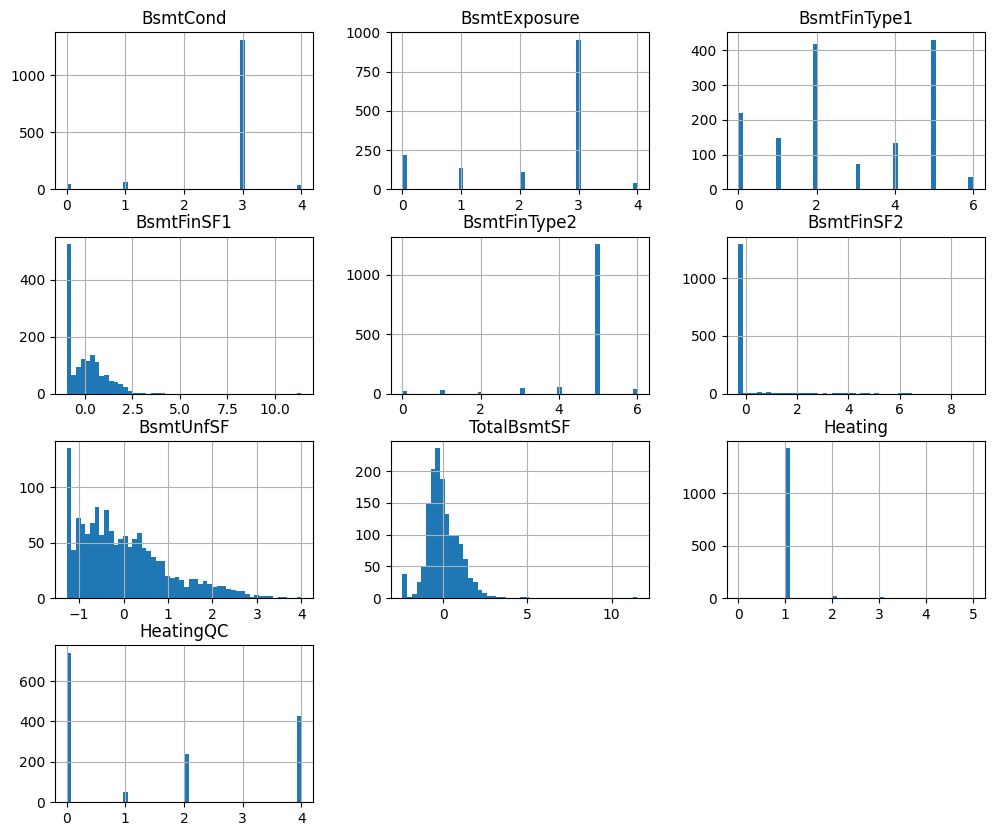

In [74]:
data_num_train[list_cols[3]].hist(bins=50)

array([[<Axes: title={'center': 'CentralAir'}>,
        <Axes: title={'center': 'Electrical'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>],
       [<Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>],
       [<Axes: title={'center': 'HalfBath'}>, <Axes: >, <Axes: >]],
      dtype=object)

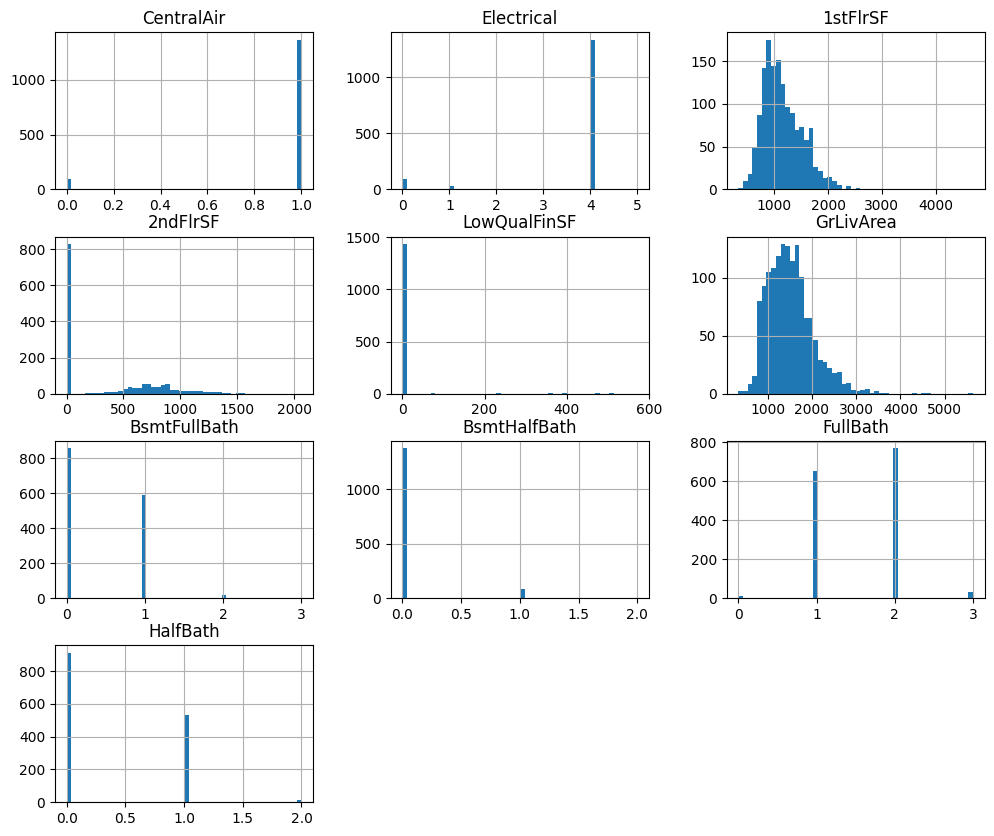

In [75]:
data_num[list_cols[4]].hist(bins=50)

In [76]:
data[list_cols[4]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CentralAir    1460 non-null   object
 1   Electrical    1459 non-null   object
 2   1stFlrSF      1460 non-null   int64 
 3   2ndFlrSF      1460 non-null   int64 
 4   LowQualFinSF  1460 non-null   int64 
 5   GrLivArea     1460 non-null   int64 
 6   BsmtFullBath  1460 non-null   int64 
 7   BsmtHalfBath  1460 non-null   int64 
 8   FullBath      1460 non-null   int64 
 9   HalfBath      1460 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 114.2+ KB


In [78]:
data_num_train['CentralAir'] = data_num['CentralAir']
data_num_train['Electrical'] = data_num['Electrical']
data_num_train['1stFlrSF'] = np.log(data_num['1stFlrSF'])
data_num_train['2ndFlrSF'] = standard_scaler.fit_transform(np.array(data_num['2ndFlrSF']).reshape(-1, 1))
data_num_train['LowQualFinSF'] = standard_scaler.fit_transform(np.array(data_num['LowQualFinSF']).reshape(-1, 1))
data_num_train['GrLivArea'] = np.log(data_num['GrLivArea'])
data_num_train['BsmtFullBath'] = data_num['BsmtFullBath']
data_num_train['BsmtHalfBath'] = data_num['BsmtHalfBath']
data_num_train['FullBath'] = data_num['FullBath']
data_num_train['HalfBath'] = data_num['HalfBath']

array([[<Axes: title={'center': 'CentralAir'}>,
        <Axes: title={'center': 'Electrical'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>],
       [<Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>],
       [<Axes: title={'center': 'HalfBath'}>, <Axes: >, <Axes: >]],
      dtype=object)

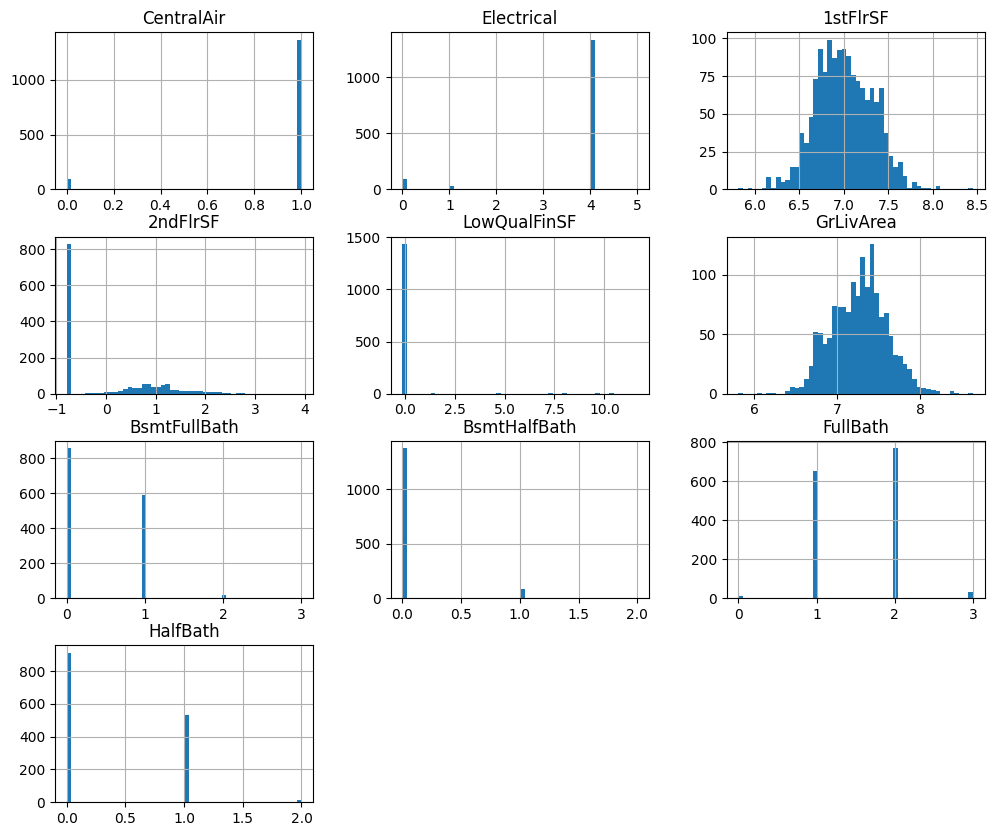

In [79]:
data_num_train[list_cols[4]].hist(bins=50)

array([[<Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'KitchenQual'}>],
       [<Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'Functional'}>,
        <Axes: title={'center': 'Fireplaces'}>],
       [<Axes: title={'center': 'FireplaceQu'}>,
        <Axes: title={'center': 'GarageType'}>,
        <Axes: title={'center': 'GarageYrBlt'}>],
       [<Axes: title={'center': 'GarageFinish'}>, <Axes: >, <Axes: >]],
      dtype=object)

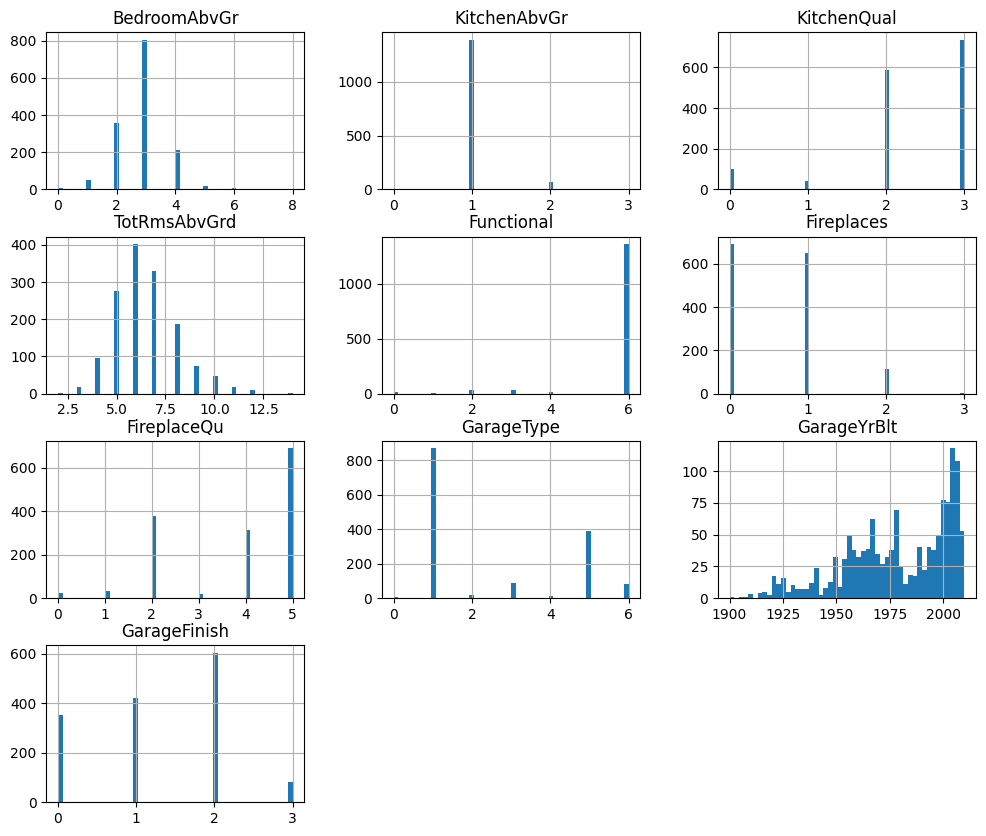

In [80]:
data_num[list_cols[5]].hist(bins=50)

In [81]:
data[list_cols[5]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BedroomAbvGr  1460 non-null   int64  
 1   KitchenAbvGr  1460 non-null   int64  
 2   KitchenQual   1460 non-null   object 
 3   TotRmsAbvGrd  1460 non-null   int64  
 4   Functional    1460 non-null   object 
 5   Fireplaces    1460 non-null   int64  
 6   FireplaceQu   770 non-null    object 
 7   GarageType    1379 non-null   object 
 8   GarageYrBlt   1379 non-null   float64
 9   GarageFinish  1379 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 114.2+ KB


In [83]:
data_num_train['BedroomAbvGr'] = data_num['BedroomAbvGr']
data_num_train['KitchenAbvGr'] = data_num['KitchenAbvGr']
data_num_train['KitchenQual'] = data_num['KitchenQual']
data_num_train['TotRmsAbvGrd'] = data_num['TotRmsAbvGrd']
data_num_train['Functional'] = data_num['Functional']
data_num_train['Fireplaces'] = data_num['Fireplaces']
data_num_train['FireplaceQu'] = data_num['FireplaceQu']
data_num_train['GarageType'] = data_num['GarageType']
data_num_train['GarageYrBlt'] = standard_scaler.fit_transform(np.array(data_num['GarageYrBlt'].fillna(0)).reshape(-1, 1))
data_num_train['GarageFinish'] = data_num['GarageFinish']

array([[<Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'KitchenQual'}>],
       [<Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'Functional'}>,
        <Axes: title={'center': 'Fireplaces'}>],
       [<Axes: title={'center': 'FireplaceQu'}>,
        <Axes: title={'center': 'GarageType'}>,
        <Axes: title={'center': 'GarageYrBlt'}>],
       [<Axes: title={'center': 'GarageFinish'}>, <Axes: >, <Axes: >]],
      dtype=object)

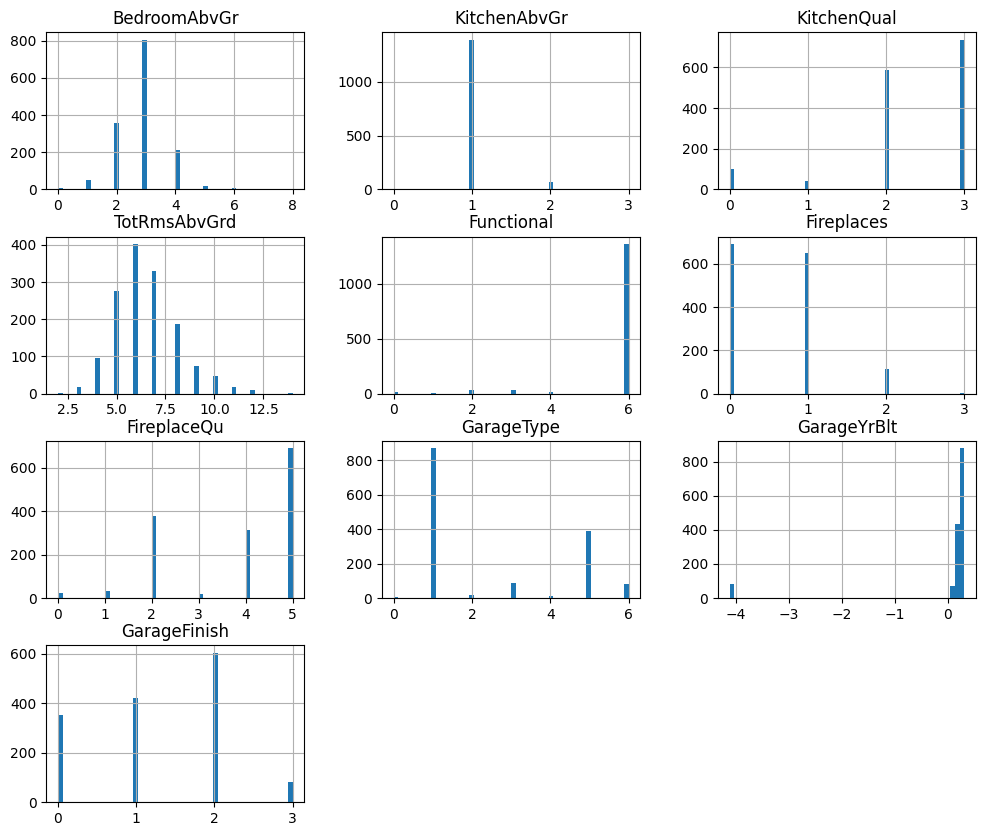

In [84]:
data_num_train[list_cols[5]].hist(bins=50)

array([[<Axes: title={'center': 'GarageCars'}>,
        <Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'GarageQual'}>],
       [<Axes: title={'center': 'GarageCond'}>,
        <Axes: title={'center': 'PavedDrive'}>,
        <Axes: title={'center': 'WoodDeckSF'}>],
       [<Axes: title={'center': 'OpenPorchSF'}>,
        <Axes: title={'center': 'EnclosedPorch'}>,
        <Axes: title={'center': '3SsnPorch'}>],
       [<Axes: title={'center': 'ScreenPorch'}>, <Axes: >, <Axes: >]],
      dtype=object)

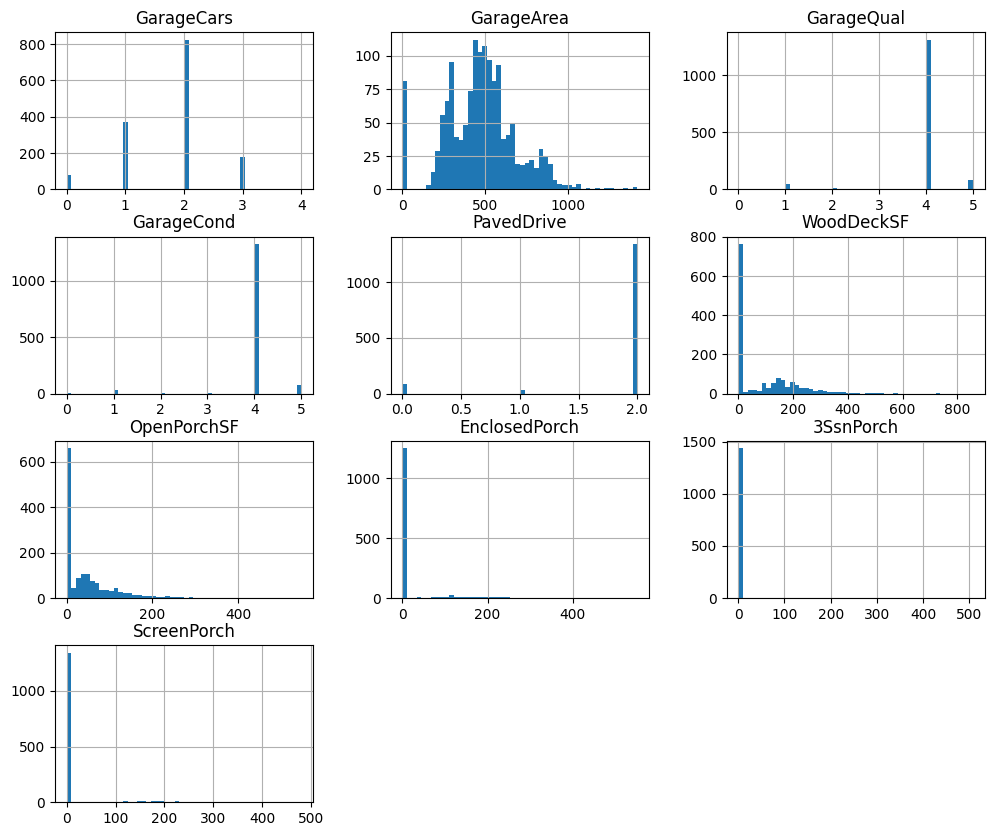

In [85]:
data_num[list_cols[6]].hist(bins=50)

In [86]:
data[list_cols[6]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GarageCars     1460 non-null   int64 
 1   GarageArea     1460 non-null   int64 
 2   GarageQual     1379 non-null   object
 3   GarageCond     1379 non-null   object
 4   PavedDrive     1460 non-null   object
 5   WoodDeckSF     1460 non-null   int64 
 6   OpenPorchSF    1460 non-null   int64 
 7   EnclosedPorch  1460 non-null   int64 
 8   3SsnPorch      1460 non-null   int64 
 9   ScreenPorch    1460 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 114.2+ KB


In [88]:
data_num_train['GarageCars'] = data_num['GarageCars']
data_num_train['GarageArea'] = standard_scaler.fit_transform(np.array(data_num['GarageArea']).reshape(-1, 1))
data_num_train['GarageQual'] = data_num['GarageQual']
data_num_train['GarageCond'] = data_num['GarageCond']
data_num_train['PavedDrive'] = data_num['PavedDrive']
data_num_train['WoodDeckSF'] = standard_scaler.fit_transform(np.array(data_num['WoodDeckSF']).reshape(-1, 1))
data_num_train['OpenPorchSF'] = standard_scaler.fit_transform(np.array(data_num['OpenPorchSF']).reshape(-1, 1))
data_num_train['EnclosedPorch'] = standard_scaler.fit_transform(np.array(data_num['EnclosedPorch']).reshape(-1, 1))
data_num_train['3SsnPorch'] = standard_scaler.fit_transform(np.array(data_num['3SsnPorch']).reshape(-1, 1))
data_num_train['ScreenPorch'] = standard_scaler.fit_transform(np.array(data_num['ScreenPorch']).reshape(-1, 1))

array([[<Axes: title={'center': 'GarageCars'}>,
        <Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'GarageQual'}>],
       [<Axes: title={'center': 'GarageCond'}>,
        <Axes: title={'center': 'PavedDrive'}>,
        <Axes: title={'center': 'WoodDeckSF'}>],
       [<Axes: title={'center': 'OpenPorchSF'}>,
        <Axes: title={'center': 'EnclosedPorch'}>,
        <Axes: title={'center': '3SsnPorch'}>],
       [<Axes: title={'center': 'ScreenPorch'}>, <Axes: >, <Axes: >]],
      dtype=object)

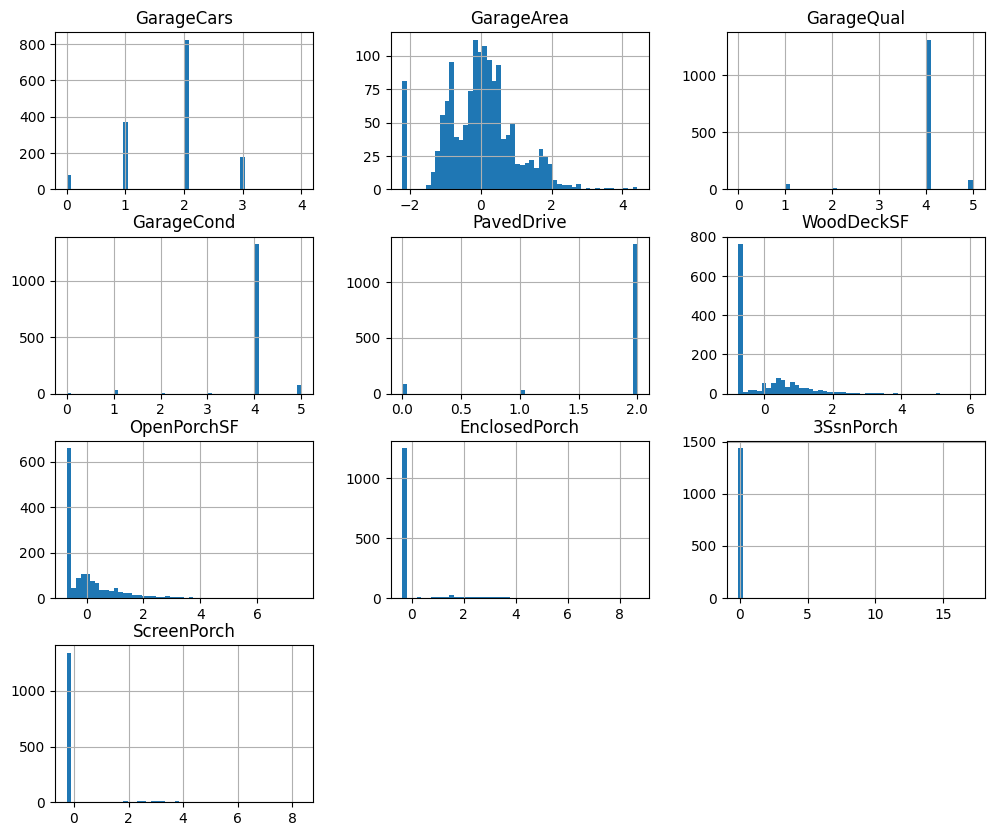

In [89]:
data_num_train[list_cols[6]].hist(bins=50)

array([[<Axes: title={'center': 'PoolArea'}>,
        <Axes: title={'center': 'PoolQC'}>,
        <Axes: title={'center': 'Fence'}>],
       [<Axes: title={'center': 'MiscFeature'}>,
        <Axes: title={'center': 'MiscVal'}>,
        <Axes: title={'center': 'MoSold'}>],
       [<Axes: title={'center': 'YrSold'}>,
        <Axes: title={'center': 'SaleType'}>,
        <Axes: title={'center': 'SaleCondition'}>],
       [<Axes: title={'center': 'SalePrice'}>, <Axes: >, <Axes: >]],
      dtype=object)

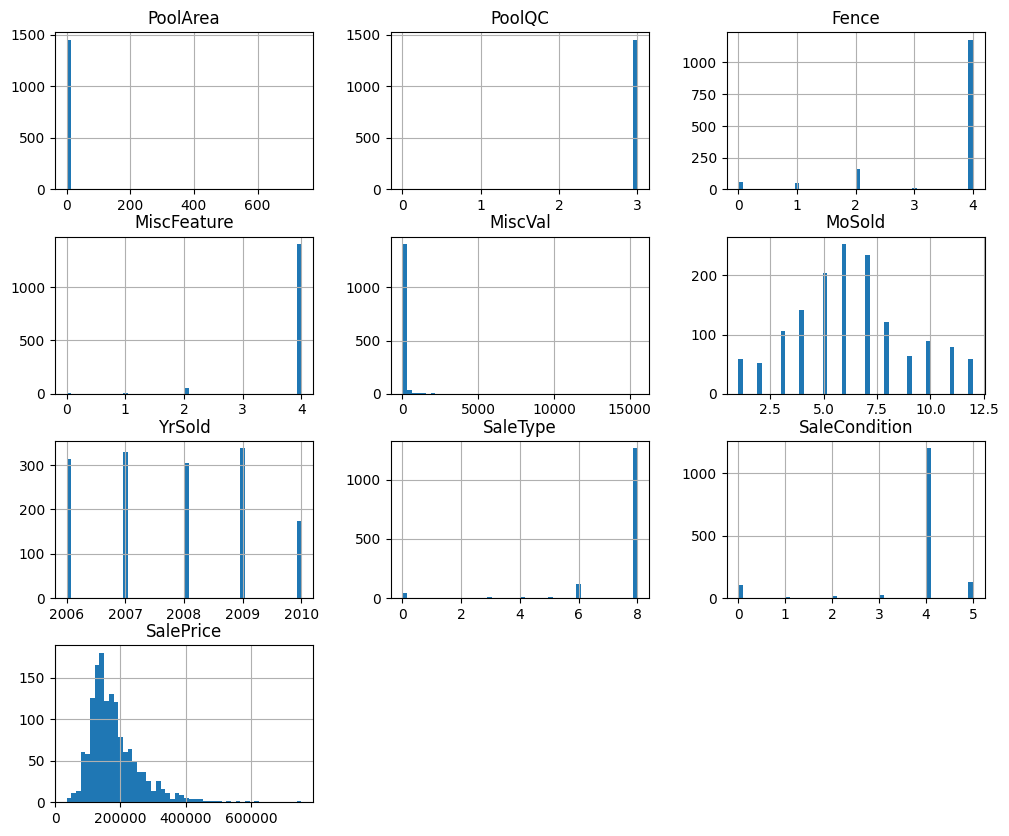

In [90]:
data_num[list_cols[7]].hist(bins=50)

In [91]:
data[list_cols[7]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PoolArea       1460 non-null   int64 
 1   PoolQC         7 non-null      object
 2   Fence          281 non-null    object
 3   MiscFeature    54 non-null     object
 4   MiscVal        1460 non-null   int64 
 5   MoSold         1460 non-null   int64 
 6   YrSold         1460 non-null   int64 
 7   SaleType       1460 non-null   object
 8   SaleCondition  1460 non-null   object
 9   SalePrice      1460 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 114.2+ KB


In [93]:
data_num_train['PoolArea'] = data_num['PoolArea']
data_num_train['PoolQC'] = data_num['PoolQC']
data_num_train['Fence'] = data_num['Fence']
data_num_train['MiscFeature'] = data_num['MiscFeature']
data_num_train['MiscVal'] = standard_scaler.fit_transform(np.array(data_num['MiscVal']).reshape(-1, 1))
data_num_train['MoSold'] = data_num['MoSold']
data_num_train['YrSold'] = standard_scaler.fit_transform(np.array(data_num['YrSold']).reshape(-1, 1))
data_num_train['SaleType'] = data_num['SaleType']
data_num_train['SaleCondition'] = data_num['SaleCondition']

array([[<Axes: title={'center': 'PoolArea'}>,
        <Axes: title={'center': 'PoolQC'}>,
        <Axes: title={'center': 'Fence'}>],
       [<Axes: title={'center': 'MiscFeature'}>,
        <Axes: title={'center': 'MiscVal'}>,
        <Axes: title={'center': 'MoSold'}>],
       [<Axes: title={'center': 'YrSold'}>,
        <Axes: title={'center': 'SaleType'}>,
        <Axes: title={'center': 'SaleCondition'}>],
       [<Axes: title={'center': 'SalePrice'}>, <Axes: >, <Axes: >]],
      dtype=object)

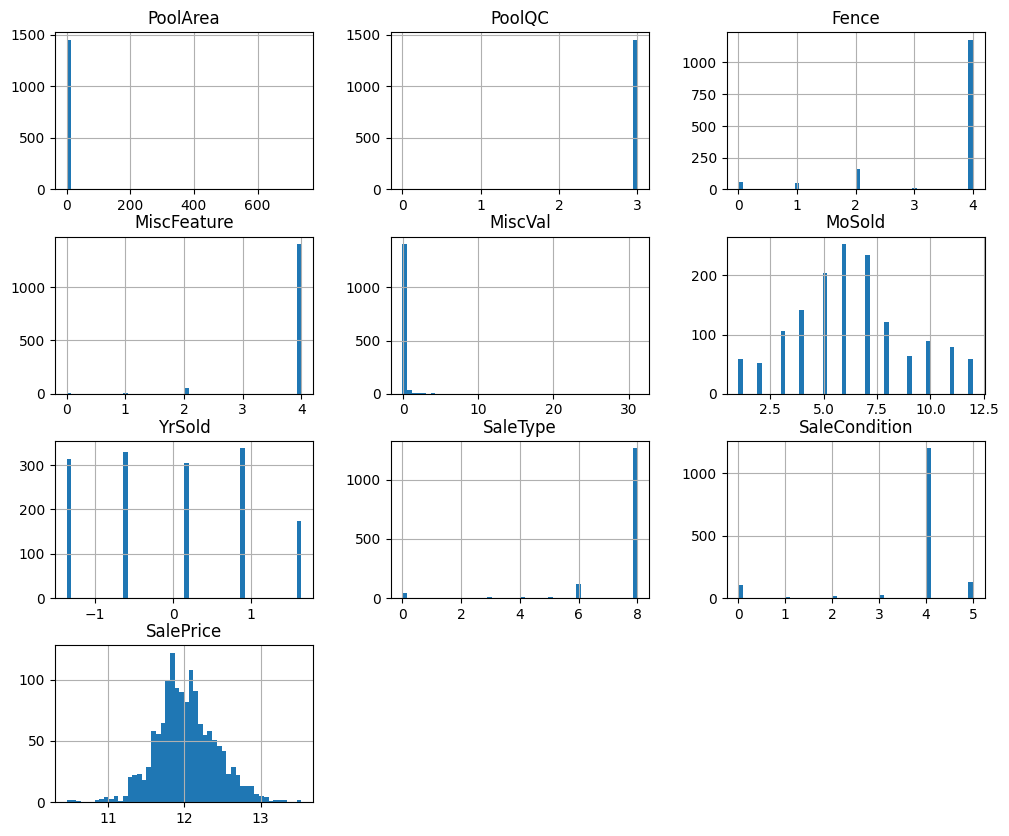

In [95]:
data_num_train[list_cols[7]].hist(bins=50)

In [108]:
for inx in range(7):
    list_cols[inx].append('SalePrice')

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'SalePrice']


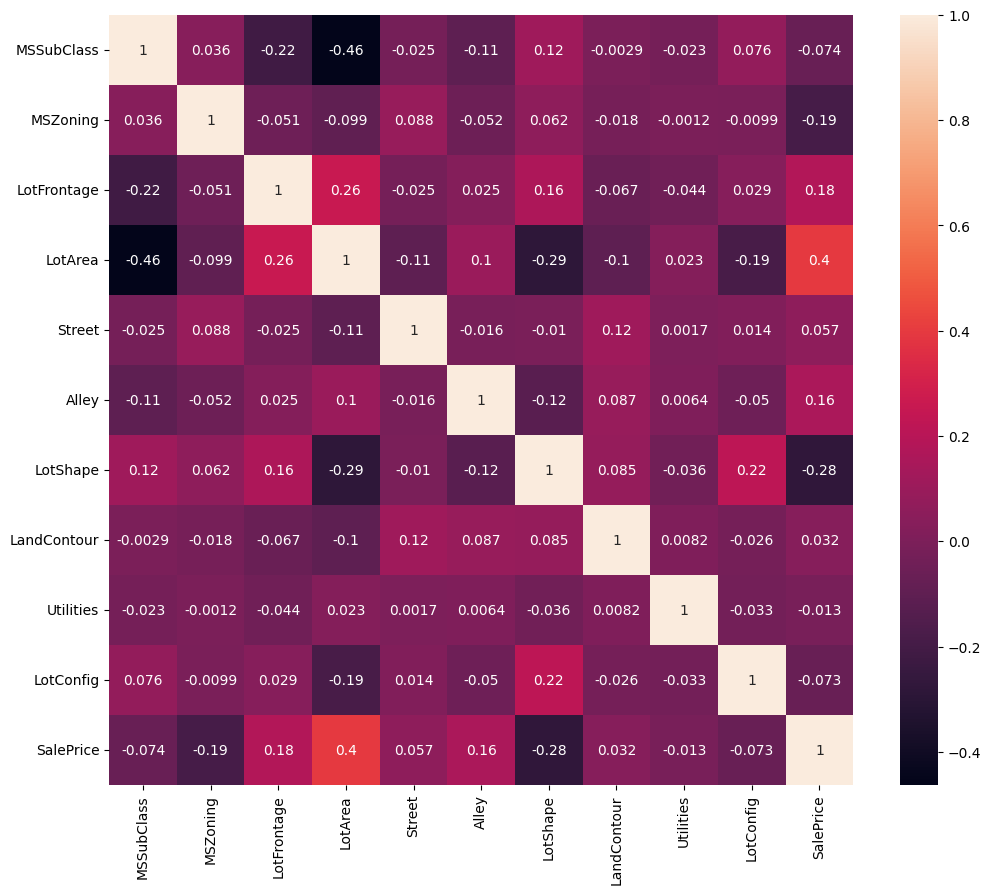

['LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'SalePrice']


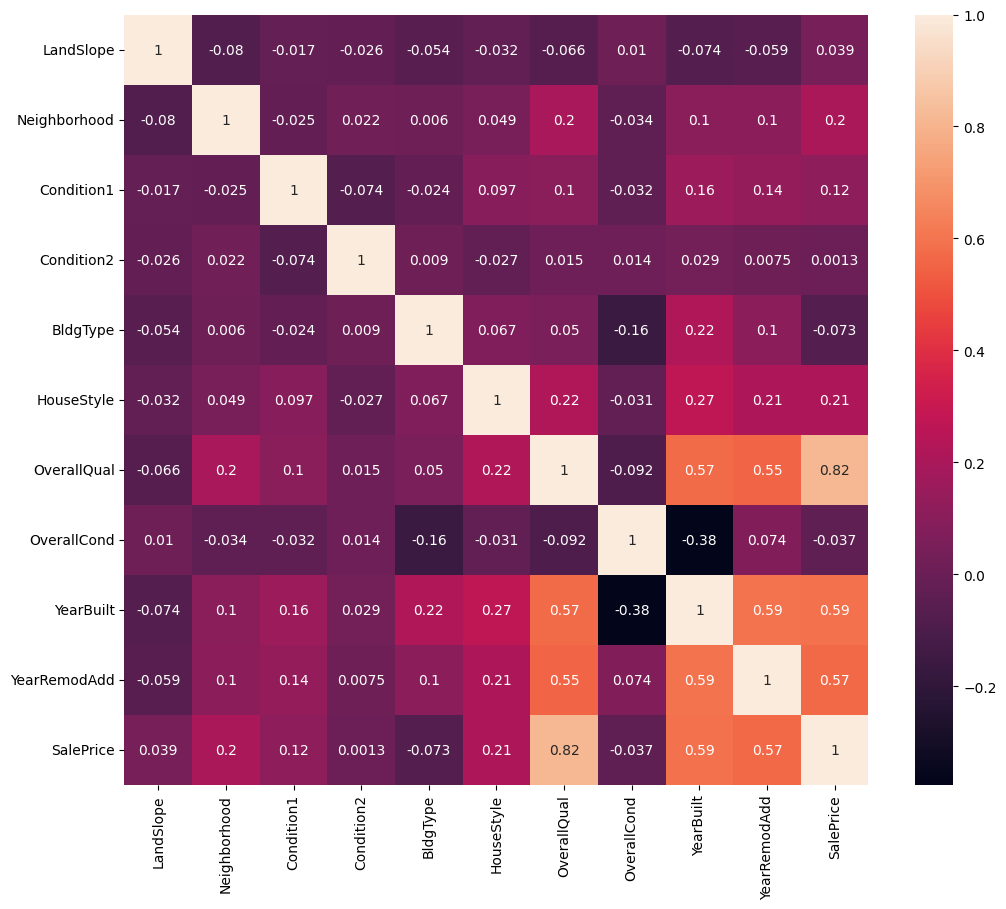

['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'SalePrice']


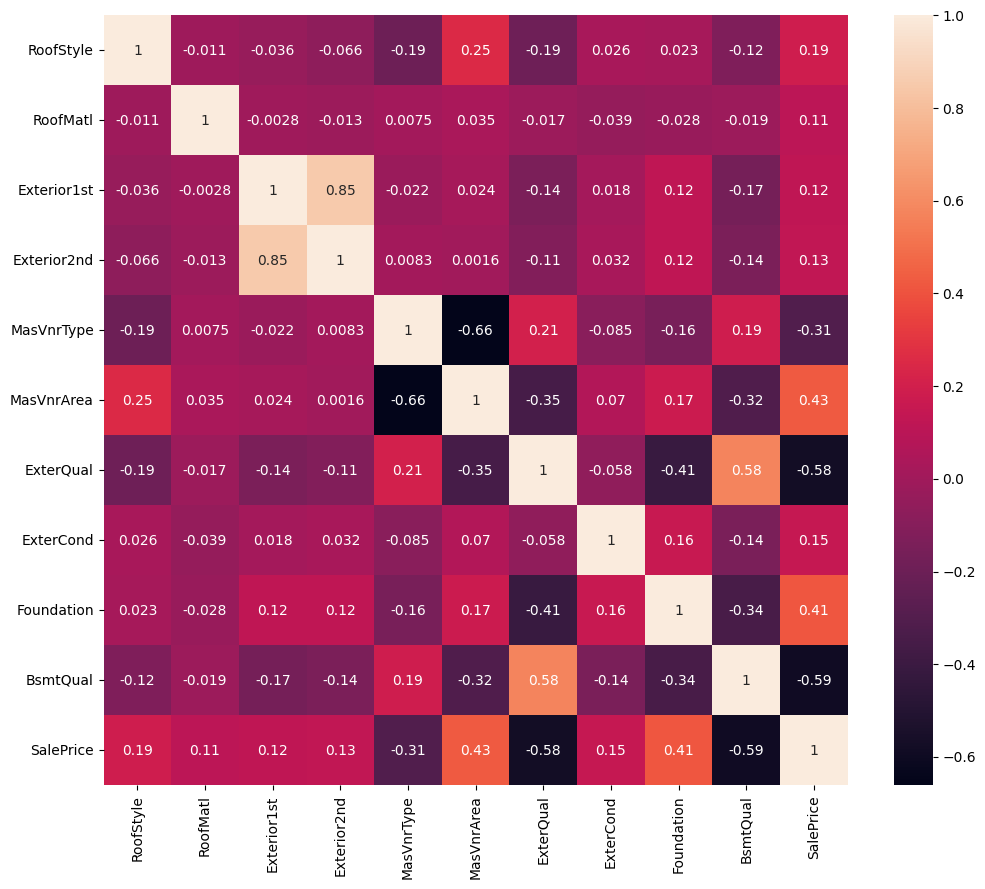

['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'SalePrice']


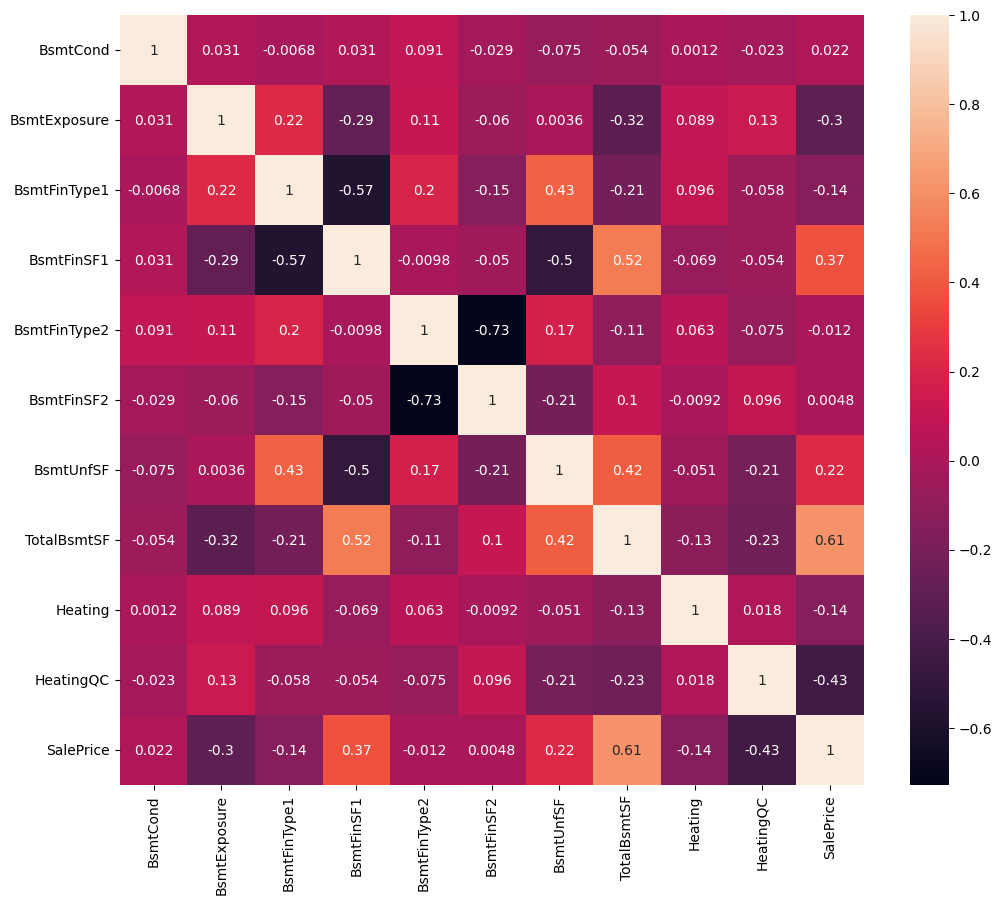

['CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'SalePrice']


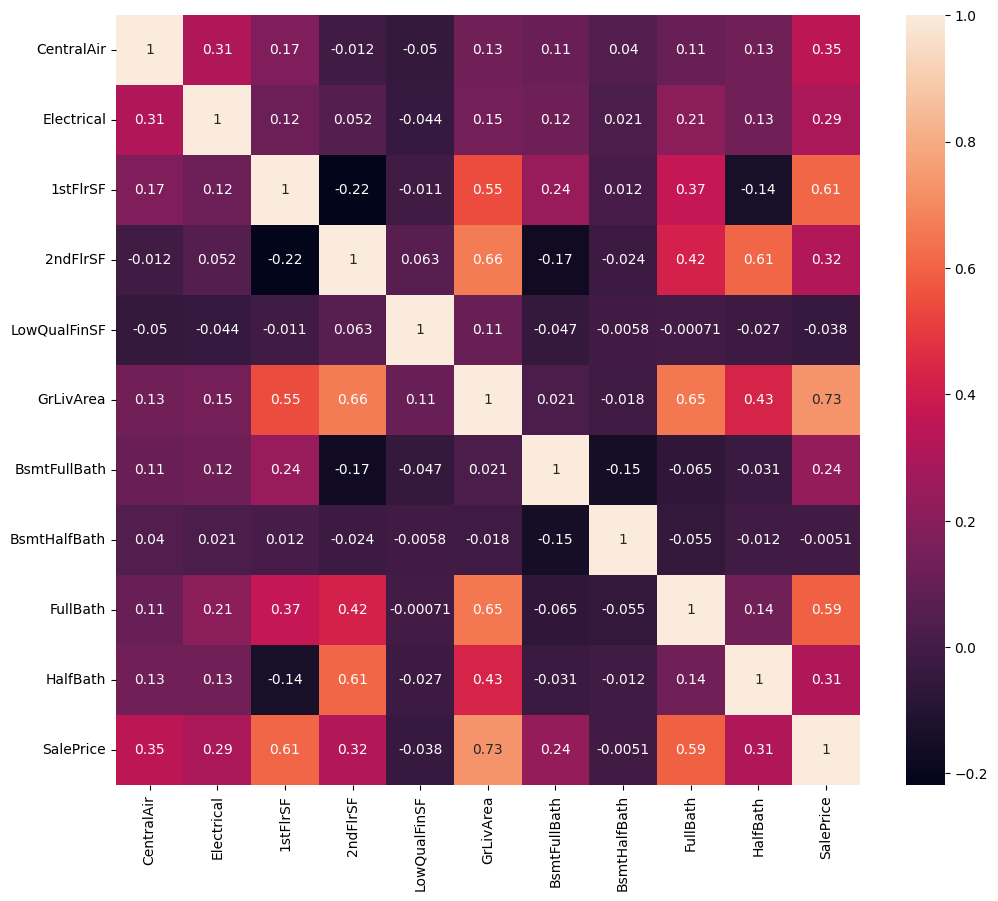

['BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'SalePrice']


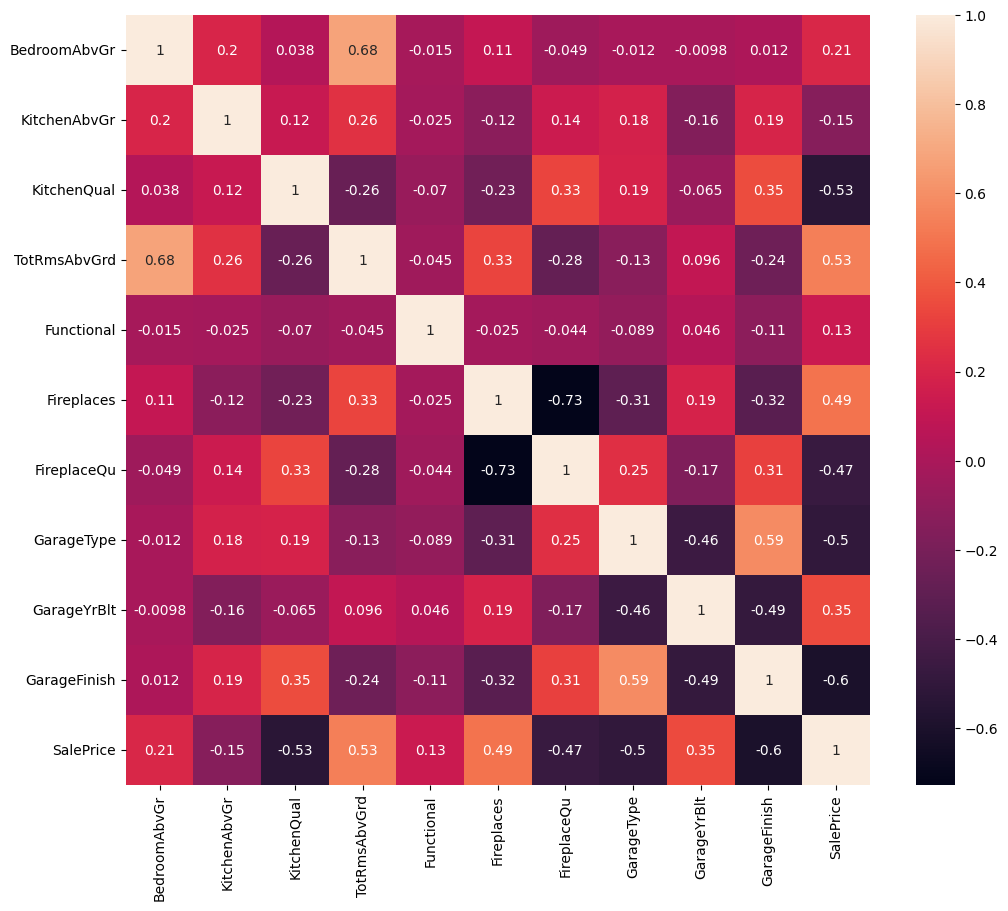

['GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'SalePrice']


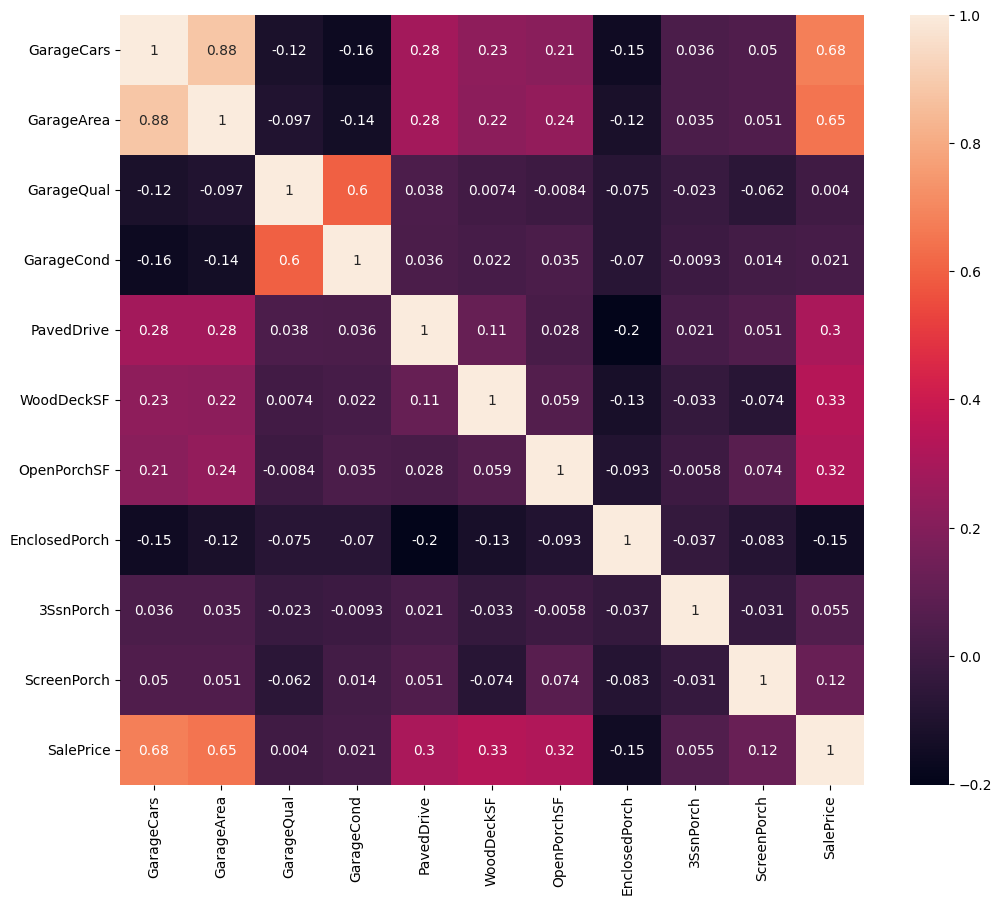

['PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']


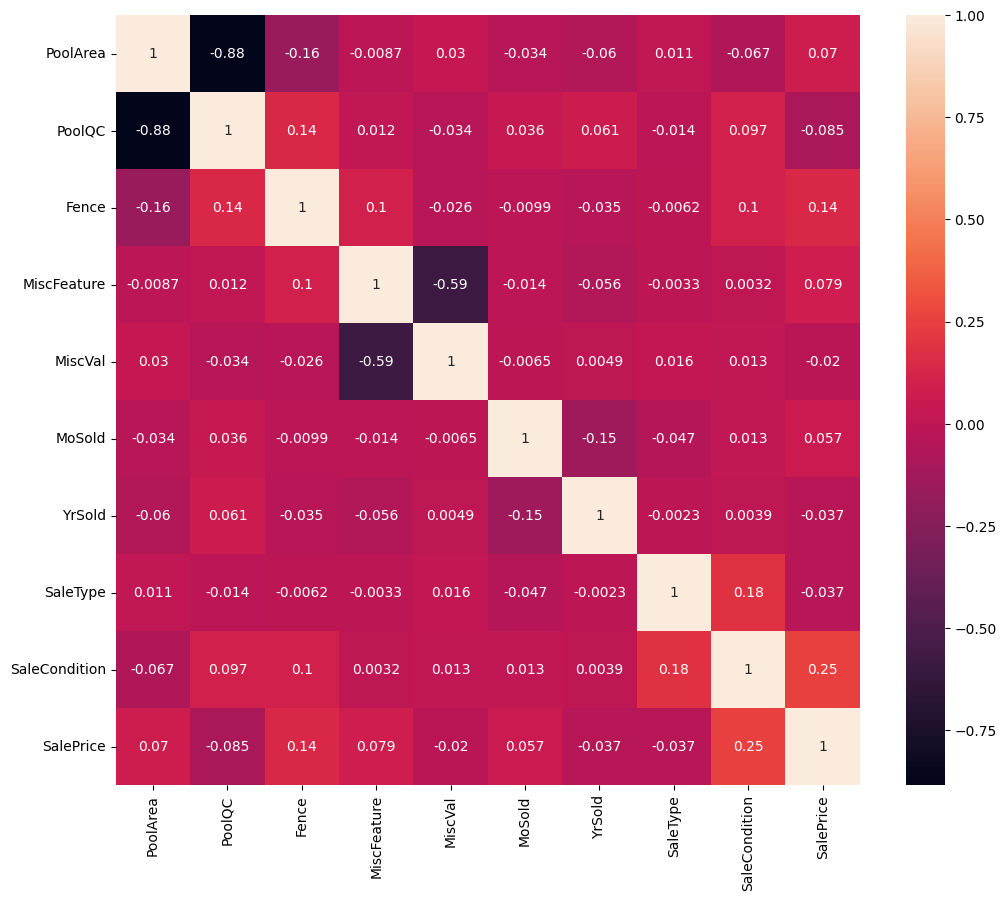

In [109]:
for lc_data in list_cols:
    print(lc_data)
    corr_matrix = data_num_train[lc_data].corr()
    sn.heatmap(corr_matrix, annot=True)
    plt.show()

In [101]:
data_num_train.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,12.247694,0.073375,3,0.212877,9.041922,1,2,3,3,0,...,-0.270208,0,3,4,4,-0.087688,2,0.138777,8,4
1,12.109011,-0.872563,3,0.645747,9.169518,1,2,3,3,0,...,-0.270208,0,3,4,4,-0.087688,5,-0.614439,8,4
2,12.317167,0.073375,3,0.299451,9.328123,1,2,0,3,0,...,-0.270208,0,3,4,4,-0.087688,9,0.138777,8,4
3,11.849398,0.309859,3,0.068587,9.164296,1,2,0,3,0,...,-0.270208,0,3,4,4,-0.087688,2,-1.367655,8,0
4,12.429216,0.073375,3,0.761179,9.565214,1,2,0,3,0,...,-0.270208,0,3,4,4,-0.087688,12,0.138777,8,4


In [112]:
data_num_train_short = data_num_train[["MSZoning", "LotArea", "LotShape", "Neighborhood", "HouseStyle", "OverallQual", "YearBuilt", "YearRemodAdd", "RoofStyle", "MasVnrType", "MasVnrArea", "ExterQual", "Foundation", "BsmtQual", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF", "HeatingQC", "CentralAir", "Electrical", "1stFlrSF", "2ndFlrSF", "GrLivArea", "BsmtFullBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenQual", "TotRmsAbvGrd", "Fireplaces", "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "PavedDrive", "WoodDeckSF", "OpenPorchSF", "SaleCondition"]]

# Full data & Linear Regression

In [115]:
rcParams['figure.figsize'] = 10, 12

def draw_pred_lines(y_pred, y_real):
    drawing_df = pd.DataFrame({"Pred": y_pred, "Real": y_real})
    drawing_df = drawing_df.sort_values("Real").reset_index(drop=True)

    for key_, val_ in drawing_df.items():
        plt.plot(range(len(val_)), val_, label=key_)

    plt.xlabel("No")
    plt.ylabel("Step Time")
    plt.title("Pred vs Real Step Time")
    plt.legend()
    plt.show()

0.125445784056728


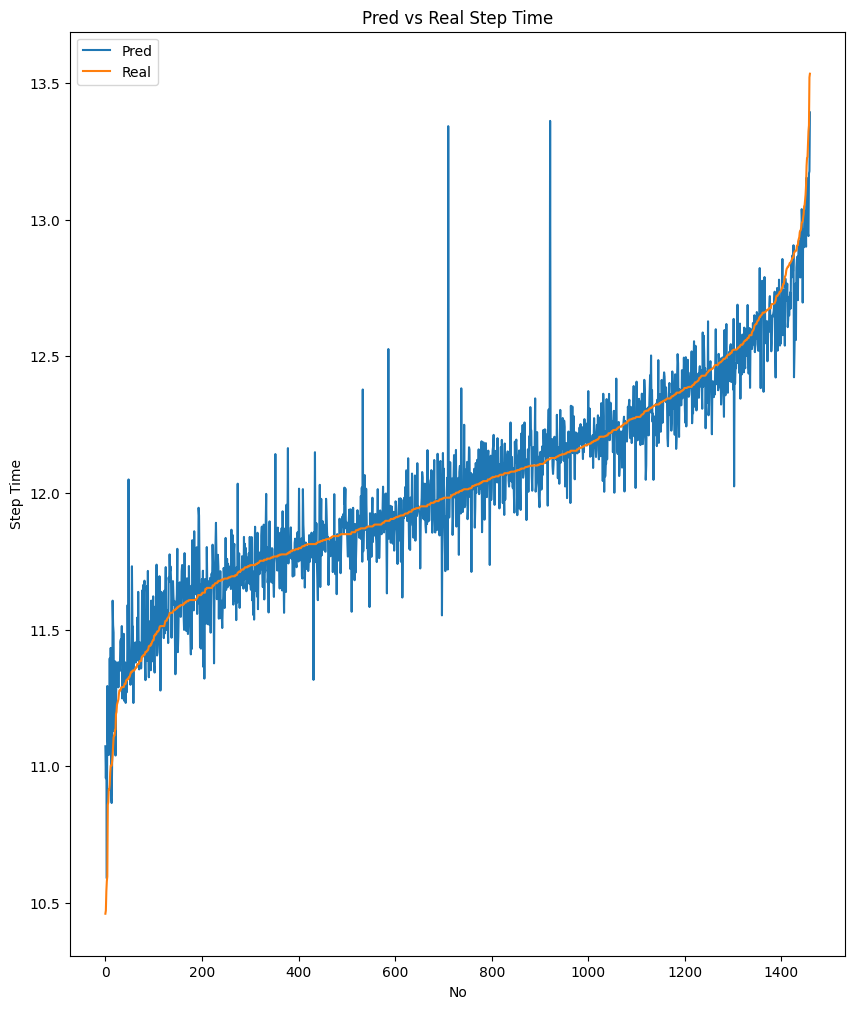

In [119]:
linear_regressor = LinearRegression()
linear_regressor.fit(data_num_train.drop('SalePrice', axis=1), data_num_train['SalePrice'])

train_pred = linear_regressor.predict(data_num_train.drop('SalePrice', axis=1))
rmse_train = mean_squared_error(data_num_train['SalePrice'], train_pred, squared=False)
print(rmse_train)

draw_pred_lines(train_pred, data_num_train['SalePrice'].to_list())

# Part Data & Linear Regression

0.13865805518116225


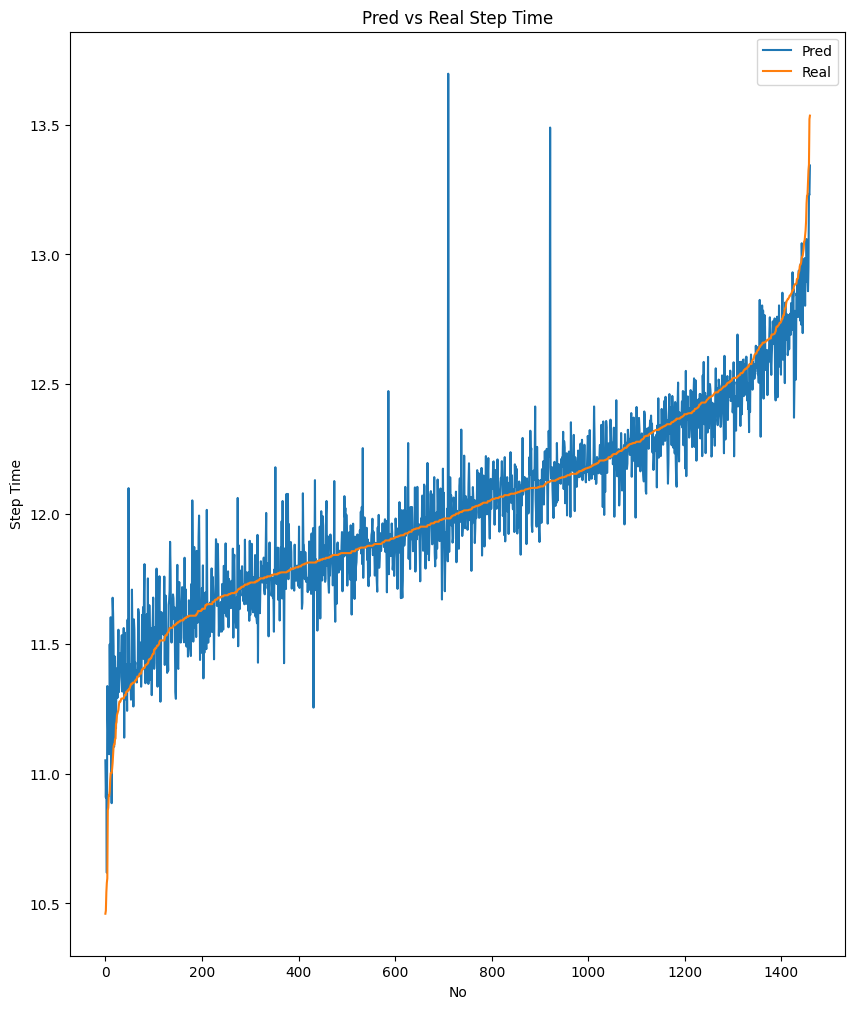

In [121]:
linear_regressor = LinearRegression()
linear_regressor.fit(data_num_train_short, data_num_train['SalePrice'])

train_pred = linear_regressor.predict(data_num_train_short)
rmse_train = mean_squared_error(data_num_train['SalePrice'], train_pred, squared=False)
print(rmse_train)

draw_pred_lines(train_pred, data_num_train['SalePrice'].to_list())